# Natural Language Processing </a>

## Assignment: K Nearest Neighbors Model for the IMDB Movie Review Dataset

For the final project, build a K Nearest Neighbors model to predict the sentiment (positive or negative) of movie reviews. The dataset is originally hosted here: http://ai.stanford.edu/~amaas/data/sentiment/

Use the notebooks from the class and implement the model, train and test with the corresponding datasets.

You can follow these steps:
1. Read training-test data (Given)
2. Train a KNN classifier (Implement)
3. Make predictions on your test dataset (Implement)

__You can use the KNN Classifier from here: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html__

## 1. Reading the dataset

We will use the __pandas__ library to read our dataset. 

#### __Training data:__
Let's read our training data. Here, we have the text and label fields. Labe is 1 for positive reviews and 0 for negative reviews.

In [1]:
import pandas as pd

train_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_train.csv', header=0)
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


#### __Test data:__

In [2]:
import pandas as pd

test_df = pd.read_csv('https://raw.githubusercontent.com/aws-samples/aws-machine-learning-university-accelerated-nlp/master/data/final_project/imdb_test.csv', header=0)
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


## 2. Train a KNN Classifier
Here, you will apply pre-processing operations we covered in the class. Then, you can split your dataset to training and validation here. For your first submission, you will use __K Nearest Neighbors Classifier__. It is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).

# **Simple Text Pre-Processing**

In [3]:
#Remove Whitespace
train_df['text'] = train_df['text'].str.strip()
train_df.head()

,text,label
0,This movie makes me want to throw up every tim...,0
1,Listening to the director's commentary confirm...,0
2,One of the best Tarzan films is also one of it...,1
3,Valentine is now one of my favorite slasher fi...,1
4,No mention if Ann Rivers Siddons adapted the m...,0


In [4]:
# Make text lowercase
train_df['text'] = train_df['text'].str.lower()
train_df.head()

,text,label
0,this movie makes me want to throw up every tim...,0
1,listening to the director's commentary confirm...,0
2,one of the best tarzan films is also one of it...,1
3,valentine is now one of my favorite slasher fi...,1
4,no mention if ann rivers siddons adapted the m...,0


In [5]:
train_df

,text,label
0,this movie makes me want to throw up every tim...,0
1,listening to the director's commentary confirm...,0
2,one of the best tarzan films is also one of it...,1
3,valentine is now one of my favorite slasher fi...,1
4,no mention if ann rivers siddons adapted the m...,0
...,...,...
24995,"you do not get more dark or tragic than ""othel...",1
24996,wow probable the worst movie i have ever seen!...,0
24997,"have not watched kids films for some years, so...",0
24998,"pickup on south street (1953), directed by mov...",1


In [6]:
#Remove Whitespace
test_df['text'] = test_df['text'].str.strip()
test_df.head()

,text,label
0,What I hoped for (or even expected) was the we...,0
1,Garden State must rate amongst the most contri...,0
2,There is a lot wrong with this film. I will no...,1
3,"To qualify my use of ""realistic"" in the summar...",1
4,Dirty War is absolutely one of the best politi...,1


In [7]:
# Make text lowercase
test_df['text'] = test_df['text'].str.lower()
test_df.head()

,text,label
0,what i hoped for (or even expected) was the we...,0
1,garden state must rate amongst the most contri...,0
2,there is a lot wrong with this film. i will no...,1
3,"to qualify my use of ""realistic"" in the summar...",1
4,dirty war is absolutely one of the best politi...,1


In [8]:
Y_train = train_df[["label"]].values.tolist()


In [9]:
X_train = train_df[["text"]].values.tolist()


In [10]:
X_test = test_df[["text"]].values.tolist()


In [11]:
Y_test = test_df[["label"]].values.tolist()

In [12]:
#Remove all punctuation
import re, string
X_train_2 = []
for i in X_train:
  for x in i:
    x = re.compile('<.*?>').sub('', x)
    x = re.compile('[%s]' % re.escape(string.punctuation)).sub('', x)
  X_train_2.append(i)

In [13]:
print(X_train_2[:10])

[["this movie makes me want to throw up every time i see it. if you take the first movie, and reverse the plot (ariel wants to leave the sea, her daughter wants to go to the sea), take the same characters and give them new animals and new names, and then throw in crappy animation and the biggest suck factor, possible, you get the little mermaid 2. its basically a copy of the first movie with a reversed plot. i'll take you through the horror of it step by step. these are the people from the 1st movie: first of all, prince eric is still prince eric, with about 3 lines in the whole movie. ariel is uptight, annoying, and is not the carefree, headstrong spirit we saw in the 1st. in fact, she is the exact opposite. sebastian is still sebastian only less cute, less convincing as being stressed out, and the jokes just aren't funny anymore. flounder has about 2 lines. he now has kids and he talks with a dumb nasal voice. scuttle is still dumb scuttle only not funny. king triton's character is p

In [14]:
#Remove all punctuation
import re, string
X_test_2 = []
for i in X_test:
  for x in i:
    x = re.compile('<.*?>').sub('', x)
    x = re.compile('[%s]' % re.escape(string.punctuation)).sub('', x)
  X_test_2.append(i)

In [15]:
print(X_test_2[:10])

[['what i hoped for (or even expected) was the well known "stop motion" imagery and extreme slow motions, extreme zooms and all embracing fish eye takes. in short: the art of a) finding interesting visual events and b) capturing them in a way the human eye is not capable of, to be replayed so that the human eye can see. the stuff that made the other qatsi\'s hits.<br /><br />i just wondered how the creation of the whole would fit the title.<br /><br />having watched the movie i got the feeling that the focus in this third part was on the message and not on the wrapping. that\'s fine, especially since the message is so valid. but i already knew the message, and it appeared there was nothing else left for me. more then half the film was solarized or colorized or posterized or transformed through some other filter. it looked a lot like the effects your video camera does but you never use. a lot of the images would have been prettier without the filters, like the giraffe and zebra chase. y

In [16]:
X_test = X_test_2

In [17]:
X_test_2 = []
for i in X_test:
  for x in i:
    new_string = x.translate(str.maketrans(' ', ' ', string.punctuation))
    new_string = new_string.replace('br br', "")
    X_test_2.append(new_string)

In [18]:
X_test_2

['what i hoped for or even expected was the well known stop motion imagery and extreme slow motions extreme zooms and all embracing fish eye takes in short the art of a finding interesting visual events and b capturing them in a way the human eye is not capable of to be replayed so that the human eye can see the stuff that made the other qatsis hits i just wondered how the creation of the whole would fit the title having watched the movie i got the feeling that the focus in this third part was on the message and not on the wrapping thats fine especially since the message is so valid but i already knew the message and it appeared there was nothing else left for me more then half the film was solarized or colorized or posterized or transformed through some other filter it looked a lot like the effects your video camera does but you never use a lot of the images would have been prettier without the filters like the giraffe and zebra chase you could say that technology or whatever human ba

In [19]:
X_train = X_train_2
X_train

[["this movie makes me want to throw up every time i see it. if you take the first movie, and reverse the plot (ariel wants to leave the sea, her daughter wants to go to the sea), take the same characters and give them new animals and new names, and then throw in crappy animation and the biggest suck factor, possible, you get the little mermaid 2. its basically a copy of the first movie with a reversed plot. i'll take you through the horror of it step by step. these are the people from the 1st movie: first of all, prince eric is still prince eric, with about 3 lines in the whole movie. ariel is uptight, annoying, and is not the carefree, headstrong spirit we saw in the 1st. in fact, she is the exact opposite. sebastian is still sebastian only less cute, less convincing as being stressed out, and the jokes just aren't funny anymore. flounder has about 2 lines. he now has kids and he talks with a dumb nasal voice. scuttle is still dumb scuttle only not funny. king triton's character is p

In [20]:
X_train_2 = []
for i in X_train:
  for x in i:
    new_string = x.translate(str.maketrans(' ', ' ', string.punctuation))
    new_string = new_string.replace('br br', "")
    X_train_2.append(new_string)

In [21]:
print(X_train_2[1])

listening to the directors commentary confirmed what i had suspected whilst watching the film this is a movie made by a guy who wants to play at making a movie the plot is the kind of thing that deluded teenagers churn out when theyre going through that i could write a bookscreenplayaward winning sitcom phase theres a germ of an interesting idea buried in there probably because its a sequel to someone elses movie but it is totally buried under an underwritten badly executed and laughably unthoughtout script the lines are dire and the performances are unengaging though again im inclined to blame the director he does not appear to have consulted the actors at all about what is required rather plonked the script in their hands pointed the camera at them and told them to get on with it who knows with a little coaching these actors could have acquitted themselves better say what you like about musicians in movies jon bon jovi was excellent in row your boat and more than acceptable in the le

In [22]:
print(X_train_2[:3])

['this movie makes me want to throw up every time i see it if you take the first movie and reverse the plot ariel wants to leave the sea her daughter wants to go to the sea take the same characters and give them new animals and new names and then throw in crappy animation and the biggest suck factor possible you get the little mermaid 2 its basically a copy of the first movie with a reversed plot ill take you through the horror of it step by step these are the people from the 1st movie first of all prince eric is still prince eric with about 3 lines in the whole movie ariel is uptight annoying and is not the carefree headstrong spirit we saw in the 1st in fact she is the exact opposite sebastian is still sebastian only less cute less convincing as being stressed out and the jokes just arent funny anymore flounder has about 2 lines he now has kids and he talks with a dumb nasal voice scuttle is still dumb scuttle only not funny king tritons character is probably the best he still retain

In [23]:
print(X_test_2[1])

garden state must rate amongst the most contrived and pretentious films of all time the plot is a simple one involving a young man returning home after his mothers death and discovering love but really the plot isnt important what is important to zach braff  writer director and star  is that he is able to hang from the plot all the necessary accoutrements of an indie or arty film we therefore are presented with endless cute and quirky characters and scenes that dont exist for reasons of plot or character development but simply to give some artistic credibility to the film à la wes anderson  or so braff hopes unfortunately and somewhat astonishingly braff has not only fooled many on imdb but also some critics who really ought to have known better of course braffs gratuitous use of the quirky alone does not make garden state a bad film what really makes garden state a stinker is braffs script he simply does not have the writing skills to carry this film off and the dialogue and characte

# **Lexicon-based text processing**

In [24]:
import nltk

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
# We will use a tokenizer from the NLTK library

from nltk.tokenize import word_tokenize

Stop Word Removal

In [26]:
X_train_2[0]

'this movie makes me want to throw up every time i see it if you take the first movie and reverse the plot ariel wants to leave the sea her daughter wants to go to the sea take the same characters and give them new animals and new names and then throw in crappy animation and the biggest suck factor possible you get the little mermaid 2 its basically a copy of the first movie with a reversed plot ill take you through the horror of it step by step these are the people from the 1st movie first of all prince eric is still prince eric with about 3 lines in the whole movie ariel is uptight annoying and is not the carefree headstrong spirit we saw in the 1st in fact she is the exact opposite sebastian is still sebastian only less cute less convincing as being stressed out and the jokes just arent funny anymore flounder has about 2 lines he now has kids and he talks with a dumb nasal voice scuttle is still dumb scuttle only not funny king tritons character is probably the best he still retains

In [27]:
X_test_2[0]

'what i hoped for or even expected was the well known stop motion imagery and extreme slow motions extreme zooms and all embracing fish eye takes in short the art of a finding interesting visual events and b capturing them in a way the human eye is not capable of to be replayed so that the human eye can see the stuff that made the other qatsis hits i just wondered how the creation of the whole would fit the title having watched the movie i got the feeling that the focus in this third part was on the message and not on the wrapping thats fine especially since the message is so valid but i already knew the message and it appeared there was nothing else left for me more then half the film was solarized or colorized or posterized or transformed through some other filter it looked a lot like the effects your video camera does but you never use a lot of the images would have been prettier without the filters like the giraffe and zebra chase you could say that technology or whatever human bas

In [28]:
X_train = X_train_2
X_train[0]

'this movie makes me want to throw up every time i see it if you take the first movie and reverse the plot ariel wants to leave the sea her daughter wants to go to the sea take the same characters and give them new animals and new names and then throw in crappy animation and the biggest suck factor possible you get the little mermaid 2 its basically a copy of the first movie with a reversed plot ill take you through the horror of it step by step these are the people from the 1st movie first of all prince eric is still prince eric with about 3 lines in the whole movie ariel is uptight annoying and is not the carefree headstrong spirit we saw in the 1st in fact she is the exact opposite sebastian is still sebastian only less cute less convincing as being stressed out and the jokes just arent funny anymore flounder has about 2 lines he now has kids and he talks with a dumb nasal voice scuttle is still dumb scuttle only not funny king tritons character is probably the best he still retains

In [29]:
X_test = X_test_2
X_test[0]

'what i hoped for or even expected was the well known stop motion imagery and extreme slow motions extreme zooms and all embracing fish eye takes in short the art of a finding interesting visual events and b capturing them in a way the human eye is not capable of to be replayed so that the human eye can see the stuff that made the other qatsis hits i just wondered how the creation of the whole would fit the title having watched the movie i got the feeling that the focus in this third part was on the message and not on the wrapping thats fine especially since the message is so valid but i already knew the message and it appeared there was nothing else left for me more then half the film was solarized or colorized or posterized or transformed through some other filter it looked a lot like the effects your video camera does but you never use a lot of the images would have been prettier without the filters like the giraffe and zebra chase you could say that technology or whatever human bas

In [30]:
Y_train[0]

[0]

In [31]:
Y_test[0]

[0]

In [34]:
import pandas as pd
x_train = pd.DataFrame(X_train)
x_train.to_csv('X_train.csv')

In [35]:
Y_train = pd.DataFrame(Y_train)
Y_train.to_csv('Y_train.csv')

In [ ]:
Y_train.head()

In [70]:
x_test = pd.DataFrame(X_test)
x_test.to_csv('X_test.csv')

In [ ]:
x_test.head()

In [37]:
Y_test = pd.DataFrame(Y_test)
Y_test.to_csv('Y_test.csv')

In [ ]:
Y_test.head()

In [ ]:
from google.colab import files
x_train.to_csv('X_train', encoding = 'utf-8-sig')
files.download('X_train.csv')

In [ ]:
from google.colab import files
x_test.to_csv('X_test', encoding = 'utf-8-sig')
files.download('X_test.csv')

In [46]:
x_train.head()

,0
0,this movie makes me want to throw up every tim...
1,listening to the directors commentary confirme...
2,one of the best tarzan films is also one of it...
3,valentine is now one of my favorite slasher fi...
4,no mention if ann rivers siddons adapted the m...


In [124]:
x_test.head()

,0
0,what i hoped for or even expected was the well...
1,garden state must rate amongst the most contri...
2,there is a lot wrong with this film i will not...
3,to qualify my use of realistic in the summary ...
4,dirty war is absolutely one of the best politi...


In [48]:
Y_train.head()

,0
0,0
1,0
2,1
3,1
4,0


In [49]:
Y_test.head()

,0
0,0
1,0
2,1
3,1
4,1


In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#sourced from https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=%F0%9F%A4%94,much%20information%20to%20the%20text.
filtered_sentence = []
X_test_3 = []
for i in x_test:
  print(i)
  words = word_tokenize(i)
  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)
  text = " ".join(filtered_sentence)
  X_test_3.append(text)

In [ ]:
import nltk
from nltk.corpus import stopwords
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
#sourced from https://towardsdatascience.com/text-pre-processing-stop-words-removal-using-different-libraries-f20bac19929a#:~:text=%F0%9F%A4%94,much%20information%20to%20the%20text.
filtered_sentence = []
for i in x_train:
  words = word_tokenize(i)
  for w in words:
    if w not in stop_words:
      filtered_sentence.append(w)
  text = " ".join(filtered_sentence)
print(filtered_sentence)

In [129]:
from nltk.stem import SnowballStemmer
snow = SnowballStemmer('english')
def process_text(texts): 
    final_text_list=[]
    for sent in texts:
        
        # Check if the sentence is a missing value
        if isinstance(sent, str) == False:
            sent = ""
            
        filtered_sentence=[]
        
        sent = sent.lower() # Lowercase 
        sent = sent.strip() # Remove leading/trailing whitespace
        sent = re.sub('\s+', ' ', sent) # Remove extra space and tabs
        sent = re.compile('<.*?>').sub('', sent) # Remove HTML tags/markups:
        
        for w in word_tokenize(sent):
            # We are applying some custom filtering here, feel free to try different things
            # Check if it is not numeric and its length>2 and not in stop words
            if(not w.isnumeric()) and (len(w)>2) and (w not in stop_words):  
                # Stem and add to filtered list
                filtered_sentence.append(snow.stem(w))
        final_string = " ".join(filtered_sentence) #final string of cleaned words
 
        final_text_list.append(final_string)
        
    return final_text_list

## 3. Make predictions on your test dataset

Once we select our best performing model, we can use it to make predictions on the test dataset. You can simply use __.fit()__ function with your training data to use the best performing K value and use __.predict()__ with your test data to get your test predictions.

In [74]:
x_train.head()

,0
0,this movie makes me want to throw up every tim...
1,listening to the directors commentary confirme...
2,one of the best tarzan films is also one of it...
3,valentine is now one of my favorite slasher fi...
4,no mention if ann rivers siddons adapted the m...


In [167]:
len(x_train)

25000

In [87]:
x_train_2 = x_train.set_axis(['reviewText'], axis=1, inplace=False)
x_train_2.head()

,reviewText
0,this movie makes me want to throw up every tim...
1,listening to the directors commentary confirme...
2,one of the best tarzan films is also one of it...
3,valentine is now one of my favorite slasher fi...
4,no mention if ann rivers siddons adapted the m...


In [88]:
x_test_2 = x_test.set_axis(['reviewText'], axis=1, inplace=False)
x_test_2.head()

,reviewText
0,what i hoped for or even expected was the well...
1,garden state must rate amongst the most contri...
2,there is a lot wrong with this film i will not...
3,to qualify my use of realistic in the summary ...
4,dirty war is absolutely one of the best politi...


In [76]:
y_train = Y_train
y_train.head()

,0
0,0
1,0
2,1
3,1
4,0


In [89]:
y_train_2 = y_train.set_axis(['Value'], axis=1, inplace=False)
y_train_2.head()

,Value
0,0
1,0
2,1
3,1
4,0


In [107]:
y_train = y_train_2
y_train.head()

,Value
0,0
1,0
2,1
3,1
4,0


In [77]:
y_test = Y_test
y_test.head()

,0
0,0
1,0
2,1
3,1
4,1


In [90]:
y_test_2 = y_test.set_axis(['Value'], axis=1, inplace=False)
y_test_2.head()

,Value
0,0
1,0
2,1
3,1
4,1


In [106]:
y_test = y_test_2
y_test.head()

,Value
0,0
1,0
2,1
3,1
4,1


In [94]:
val_text_list = process_text(x_test_2["reviewText"].tolist())

In [98]:
val_text_list[0]

'hope even expect well known stop motion imageri extrem slow motion extrem zoom embrac fish eye take short art find interest visual event captur way human eye capabl replay human eye see stuff made qatsi hit wonder creation whole would fit titl watch movi got feel focus third part messag wrap that fine especi sinc messag valid alreadi knew messag appear noth els left half film solar color poster transform filter look lot like effect video camera never use lot imag would prettier without filter like giraff zebra chase could say technolog whatev human base malici sourc disfigur beauti natur use seventi effect symbol point minut row cheap look effect readi leav hope rest couldnt bad made stay slow motion slow motion good give time analyz move pictur mayb frame second there enough motion slow pleas record motiontobeslow faster like done beauti shot foam splash water laugh peopl drill song sing soldier acknowledg archiv pictur cant redon alreadi seen lot footag anyway could done without mus

In [96]:
train_text_list = process_text(x_train_2["reviewText"].tolist())



In [97]:
train_text_list[0]

'movi make want throw everi time see take first movi revers plot ariel want leav sea daughter want sea take charact give new anim new name throw crappi anim biggest suck factor possibl get littl mermaid basic copi first movi revers plot ill take horror step step peopl 1st movi first princ eric still princ eric line whole movi ariel uptight annoy carefre headstrong spirit saw 1st fact exact opposit sebastian still sebastian less cute less convinc stress joke arent funni anymor flounder line kid talk dumb nasal voic scuttl still dumb scuttl funni king triton charact probabl best still retain intimid love daughter melodi ariel princ eric appear give hoot daughter like said use charact first movi copi ursula new evil villain morgana ursula sister feel like alway live ursula shadow wouldnt scare show doorway knife cant anyth right shes failur villain voic ursula sebastian flounder replac probabl stupid sidekick tip dash walrus penguin tri hero alway fail tri plot predict becom hero end yawn

**Finding optimum k**

'The optimal K value usually found is the square root of N, where N is the total number of samples.'

In [172]:
import math
n = 25000
math.sqrt(n)

158.11388300841898

In [175]:
#We will test values around this target to see what best k is
n = []
for i in range(150, 170):
  n.append(i)

In [178]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import gensim
from gensim.models import Word2Vec
k_accuracy_high_score = 0
k_best = 0
ks= []
k_accurracies = []
for k in n:
  ### PIPELINE ###
  w2v = gensim.models.Word2Vec()
  pipeline = Pipeline([
      ('text_vect', CountVectorizer(binary=True,
      #( 'text_vect', TfidfVectorizer(use_idf=True,
                                    max_features=10)),
      ('knn', KNeighborsClassifier(n_neighbors = k))  
                                  ])

  pipeline.fit(X_train, y_train.values)
  ##K = 5


  # Use the fitted pipeline to make predictions on the validation dataset
  val_predictions = pipeline.predict(X_test)
  #print(confusion_matrix(y_test.values, val_predictions))
  #print(classification_report(y_test.values, val_predictions))
  acc = accuracy_score(y_test.values, val_predictions)
  ks.append(k)
  k_accurracies.append(acc)
  if acc > k_accuracy_high_score:
    k_accuracy_high_score = acc
    k_best = k

print(f"Best k value is {k_best} with accuracy of {k_accuracy_high_score}")

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

Best k value is 168 with accuracy of 0.52948


**Accuracies at different k's**

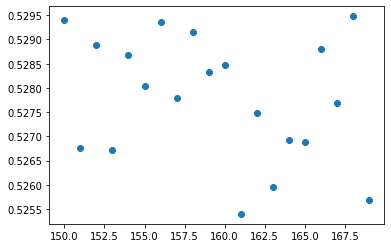

In [179]:
import matplotlib.pyplot as plt
x = ks
y = k_accurracies
plt.scatter(x,y)

In [180]:
print(f"Best k value is {k_best} with accuracy of {k_accuracy_high_score}")

Best k value is 168 with accuracy of 0.52948


In [183]:
from sklearn.neighbors import KNeighborsClassifier
 
# train the model
pipeline = Pipeline([
      ('text_vect', CountVectorizer(binary=True,
      #( 'text_vect', TfidfVectorizer(use_idf=True,
                                    max_features=10)),
      ('knn', KNeighborsClassifier(n_neighbors = 168))  
                                  ])

pipeline.fit(X_train, y_train.values)
y_pred = pipeline.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [184]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
 
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[ 2318 10182]
 [ 1581 10919]]


In [188]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_pred))
print("Accuracy (validation):", accuracy_score(y_test.values, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.19      0.28     12500
           1       0.52      0.87      0.65     12500

    accuracy                           0.53     25000
   macro avg       0.56      0.53      0.47     25000
weighted avg       0.56      0.53      0.47     25000

Accuracy (validation): 0.52948
